


**You have been hired as a consultant to a start-up that is running a targeted marketing ad campaign on Facebook. The company wants to analyze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows:**

### Inputs:
  - Name
  - e-mail
  - Country
  - Time on Facebook
  - Estimated Salary (derived from other parameters)

### Outputs:
  - Click (1: customer clicked on Ad, 0: Customer did not click on the Ad)





In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Explore dataset

In [3]:
df = pd.read_csv('clicks_dataset.csv', encoding='ISO-8859-1')
df

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [5]:
features_list = ["Time Spent on Site",'Salary']
df_des = df[features_list].describe().T
df_skew = df[features_list].skew().to_frame("skewness")
df_kurtosis = df[features_list].kurtosis().to_frame("kurtosis")

description = pd.concat([df_des, df_skew, df_kurtosis], axis=1)

description.T

,Time Spent on Site,Salary
count,499.000000,499.000000
mean,32.920178,52896.992469
std,9.103455,18989.183150
min,5.000000,20.000000
25%,26.425044,38888.117260
50%,33.196067,52840.913110
75%,39.114995,65837.288190
max,60.000000,100000.000000
skewness,-0.058715,0.014646
kurtosis,-0.097154,-0.413194


In [6]:
clicked = df[df['Clicked']== 1]

not_clicked = df[df['Clicked']== 0]

In [7]:
print("Total visitors:", len(df))
print("Number of customers clicked on ad:", len(clicked))
print("Percentage of customers clicked on ad:", round((len(clicked) / len(df)) * 100, 2),"%")
print("Number of customers not clicked on ad:", len(not_clicked))
print("Percentage of customers not clicked on ad:", "{:.2f}".format((len(not_clicked) / len(df)) * 100),"%")


Total visitors: 499
Number of customers clicked on ad: 250
Percentage of customers clicked on ad: 50.1 %
Number of customers not clicked on ad: 249
Percentage of customers not clicked on ad: 49.90 %


# Data Visualization

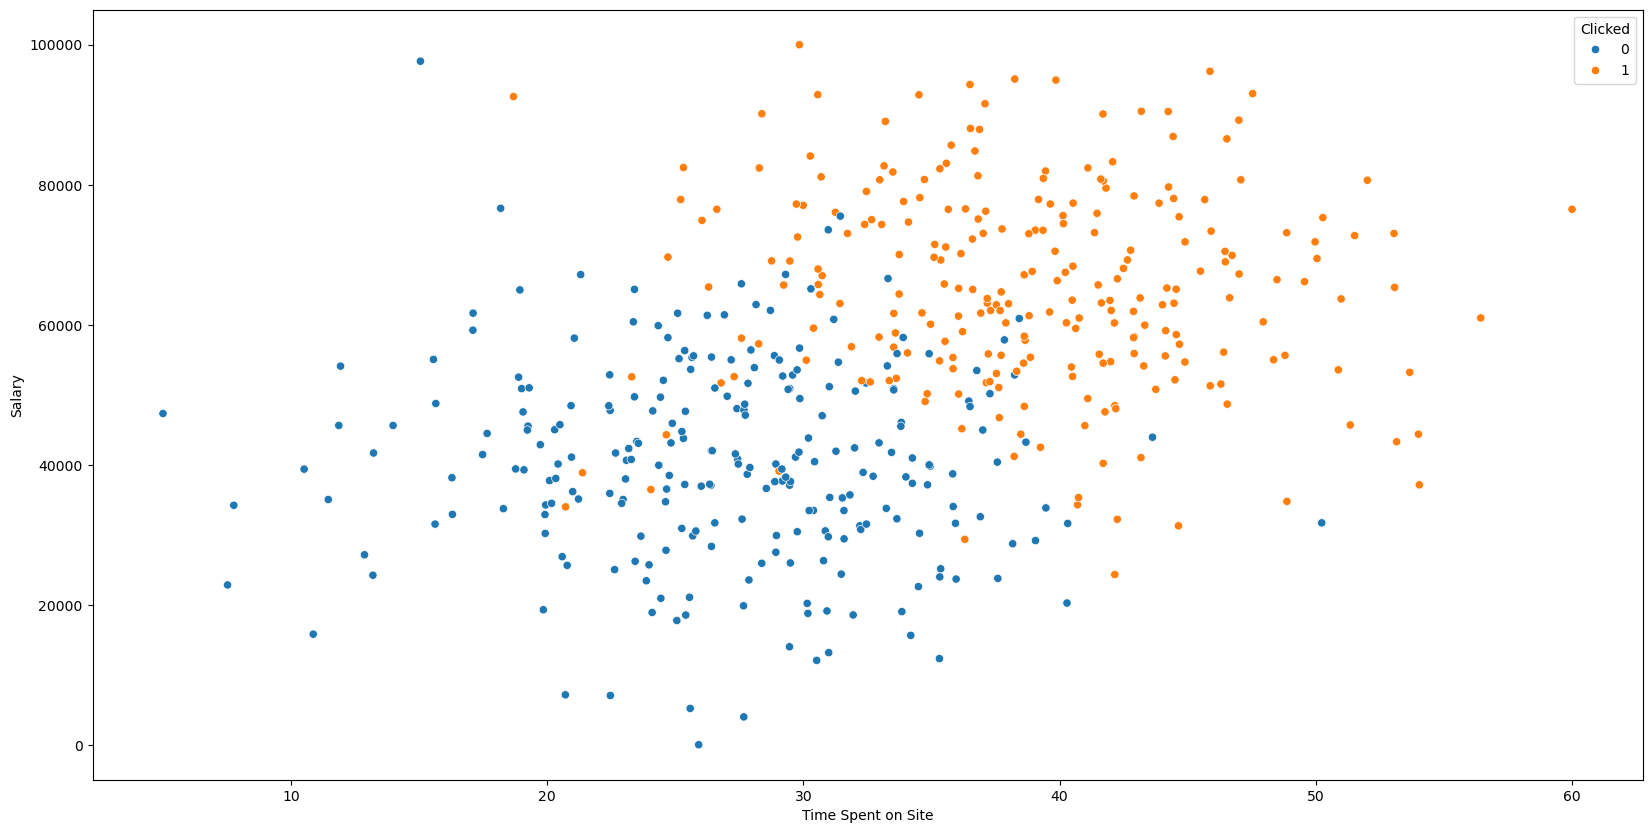

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="Time Spent on Site", y="Salary", hue="Clicked")

plt.show();

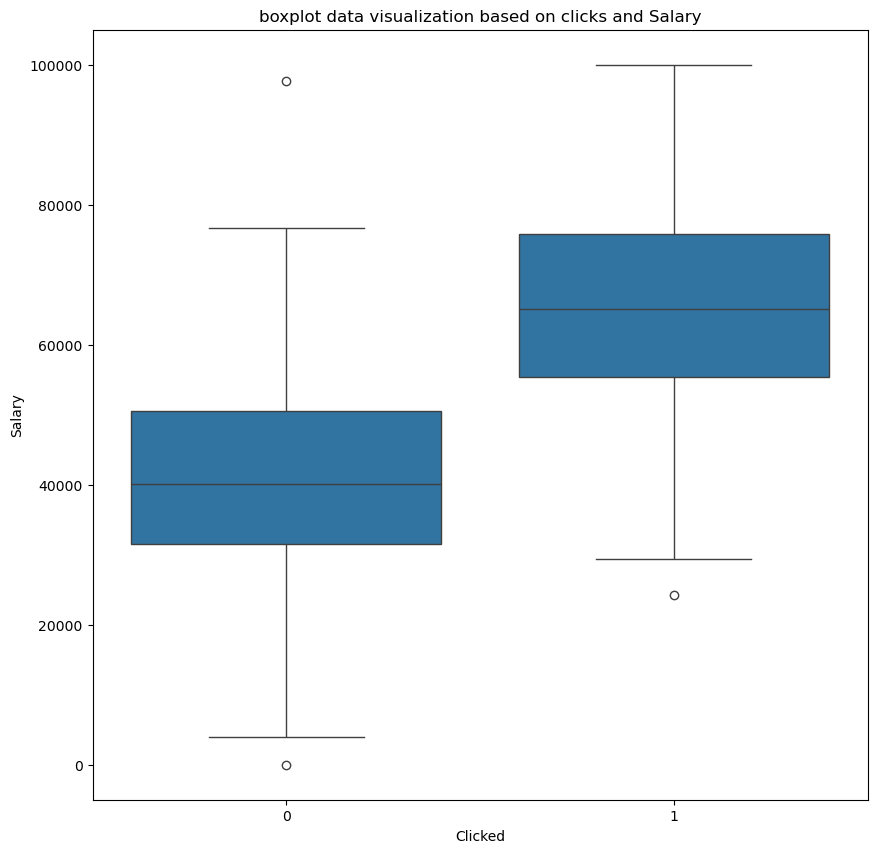

In [9]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, y="Salary",x="Clicked")
plt.title("boxplot data visualization based on clicks and Salary")
plt.show();

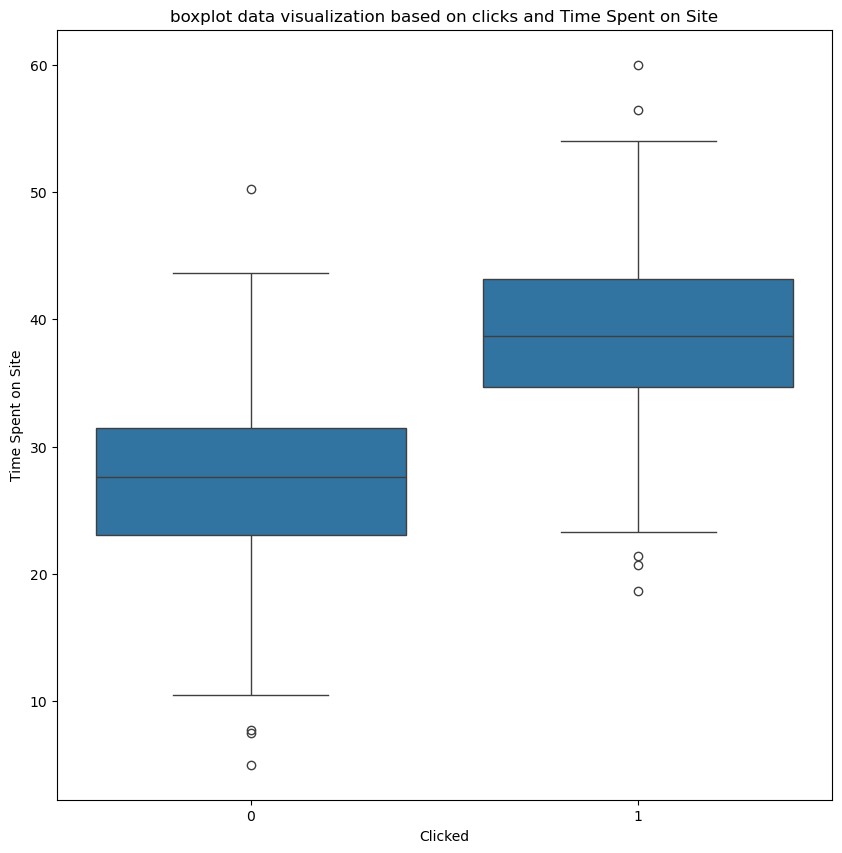

In [10]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, y="Time Spent on Site",x="Clicked")

plt.title("boxplot data visualization based on clicks and Time Spent on Site")

plt.show();

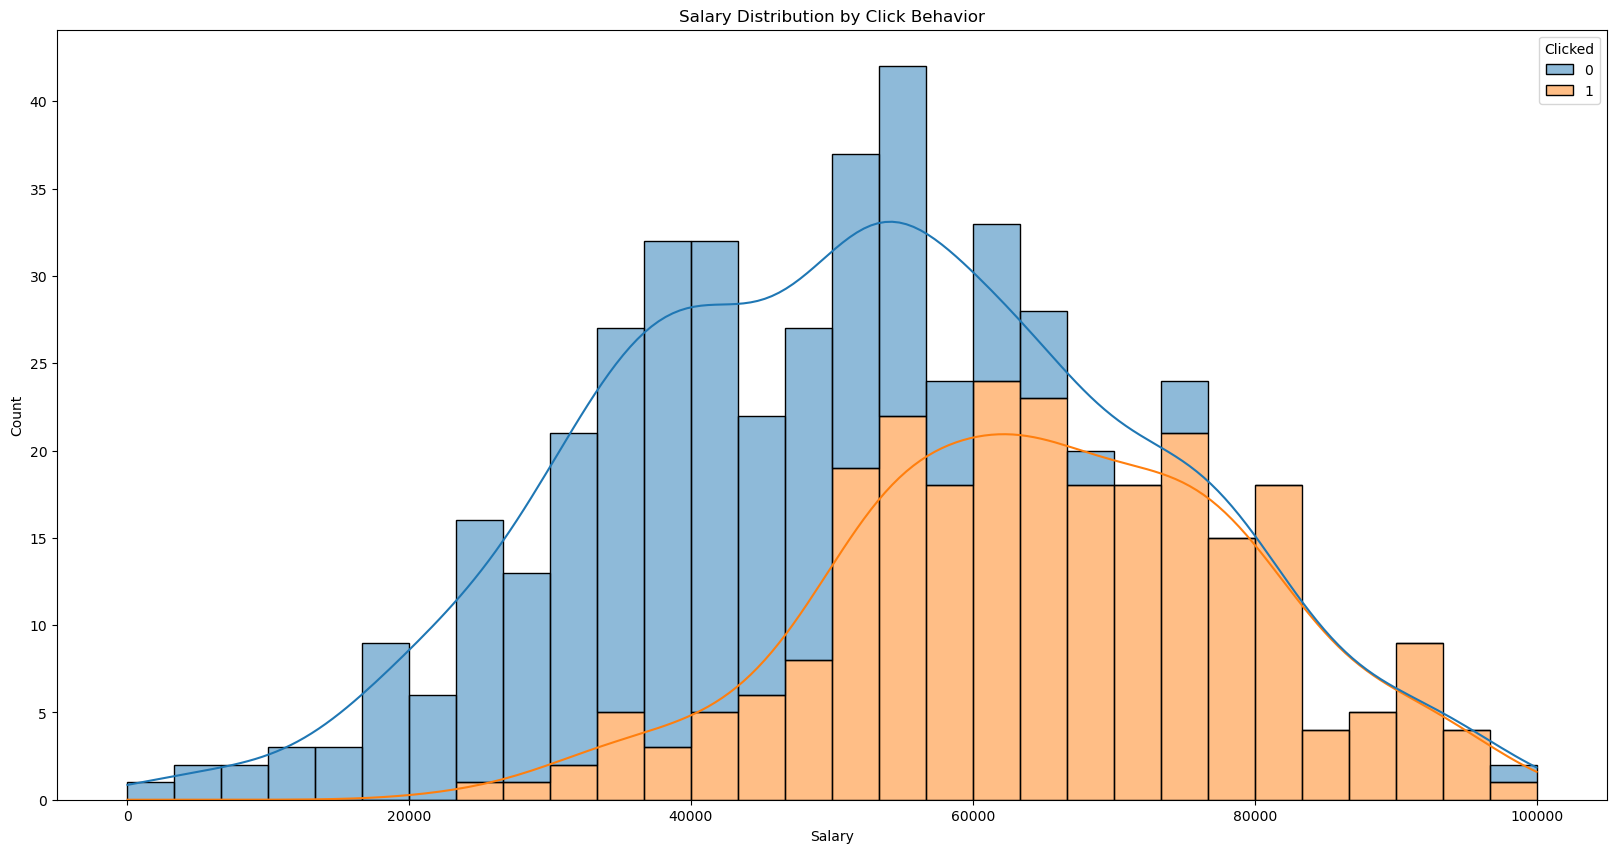

In [11]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x="Salary", kde=True, bins=30, hue="Clicked", multiple="stack")
plt.title("Salary Distribution by Click Behavior")
plt.show()


<Axes: xlabel='Time Spent on Site', ylabel='Count'>

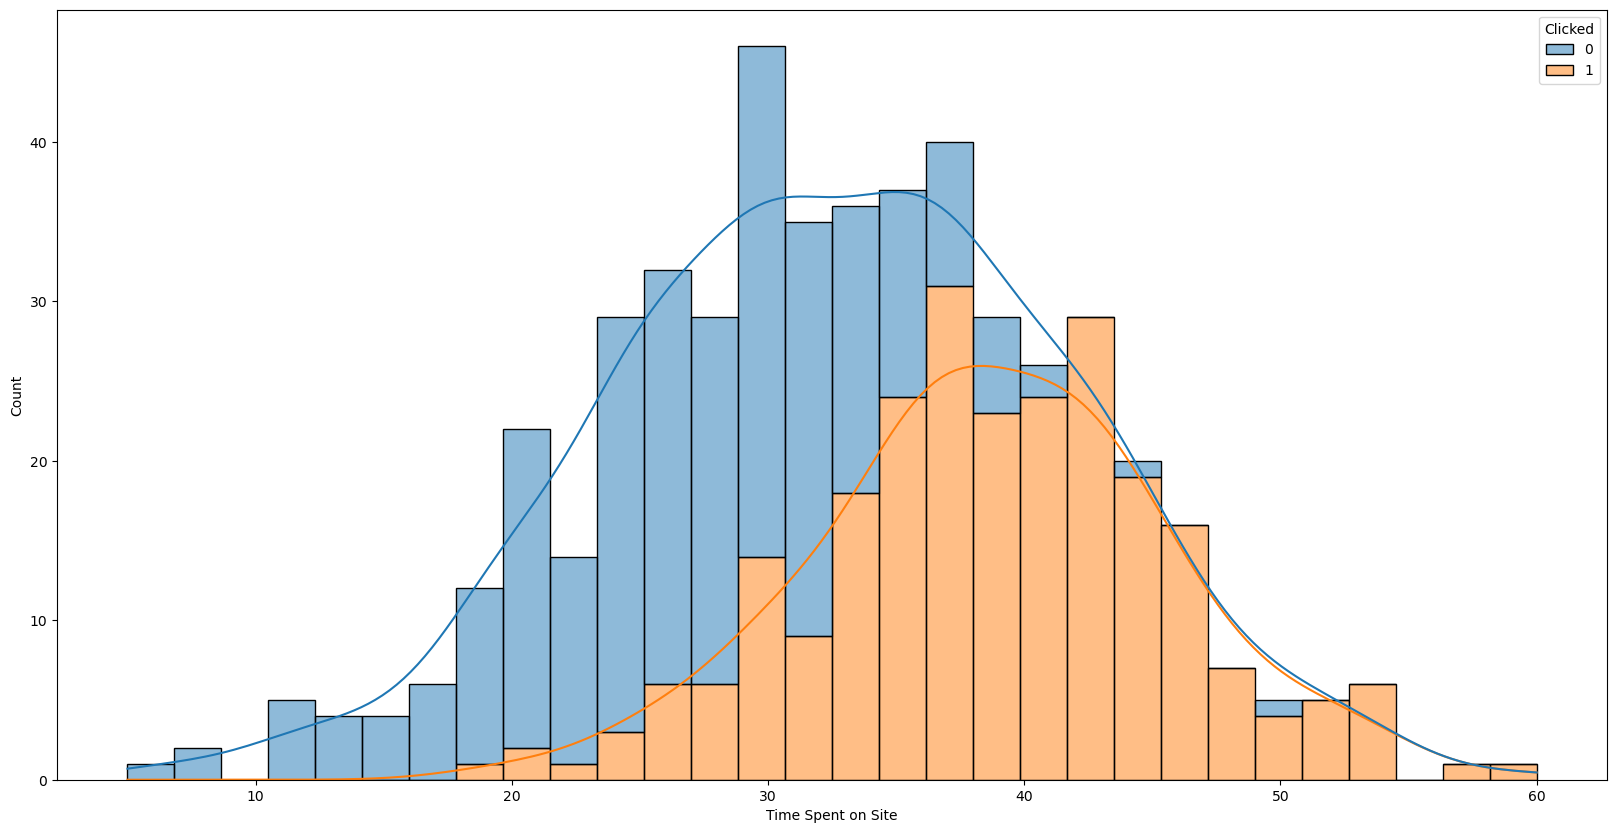

In [12]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x="Time Spent on Site",  kde=True, bins=30, hue="Clicked", multiple="stack")

# Preparing For Modeling

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [14]:
df_model =df.drop(['Names','emails','Country'], axis=1)

In [15]:
df_model

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


In [16]:
X = df_model.drop(["Clicked"], axis=1).values
y = df_model["Clicked"].values
print(X.shape)

(499, 2)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=3)

# LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_train)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       200
           1       0.91      0.91      0.91       199

    accuracy                           0.91       399
   macro avg       0.91      0.91      0.91       399
weighted avg       0.91      0.91      0.91       399



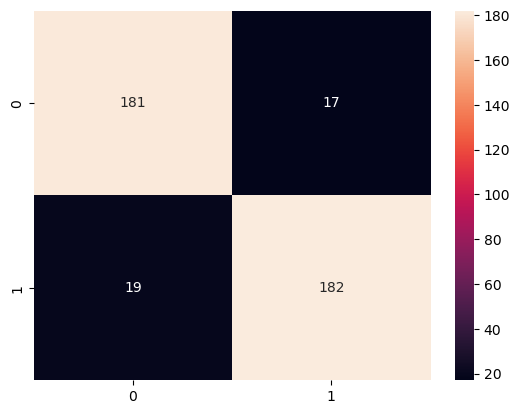

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_pred, y_train)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_train, y_pred))

In [22]:
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        49
           1       0.96      0.94      0.95        51

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



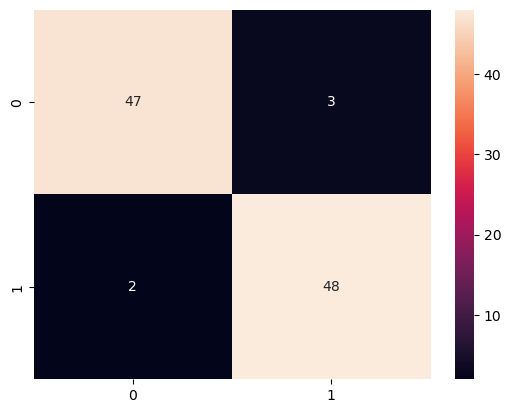

In [23]:
cm_test = confusion_matrix(y_pred_test, y_test)

sns.heatmap(cm_test, annot=True, fmt='d')

print(classification_report(y_test, y_pred_test))

# VISUALIZE TRAINING AND TESTING DATASETS

In [24]:
 # Visualising the Training set results
import numpy as np
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# Create a meshgrid ranging from the minimum to maximum value for both features

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

(-3.787379255660188, 3.482620744339657)

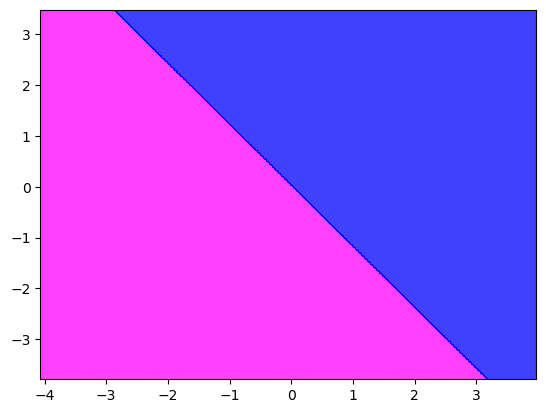

In [25]:
# plot the boundary using the trained classifier
# Run the classifier to predict the outcome on all pixels with resolution of 0.01
# Colouring the pixels with 0 or 1
# If classified as 0 it will be magenta, and if it is classified as 1 it will be shown in blue 
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

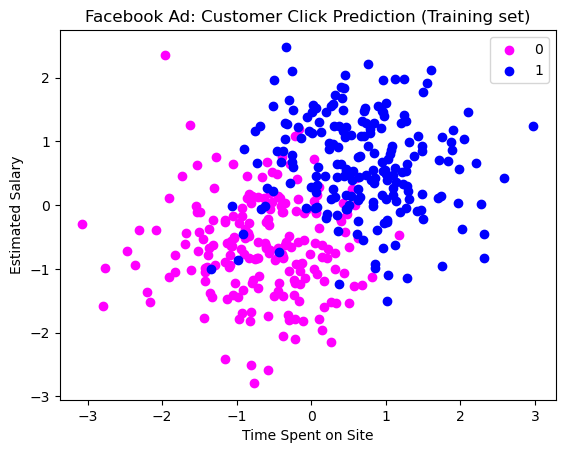

In [26]:
# plot all the actual training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
    
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

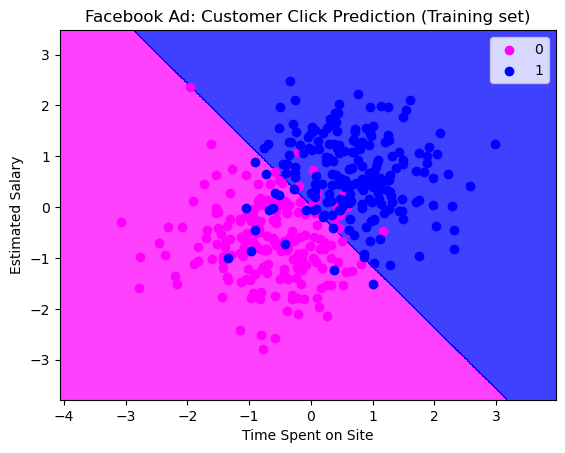

In [27]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

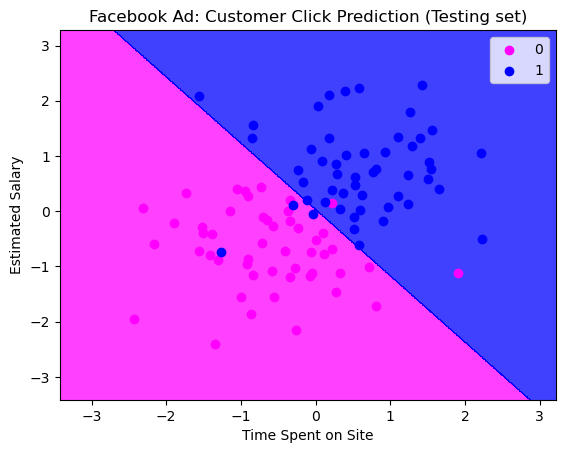

In [28]:
# Visualising the testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# XGboost Classifier

In [58]:
from xgboost import XGBClassifier
g_model = XGBClassifier(learning_rate=.1 ,random_state=3, max_depth=10, n_estimators=1000)

g_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=3, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       199

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



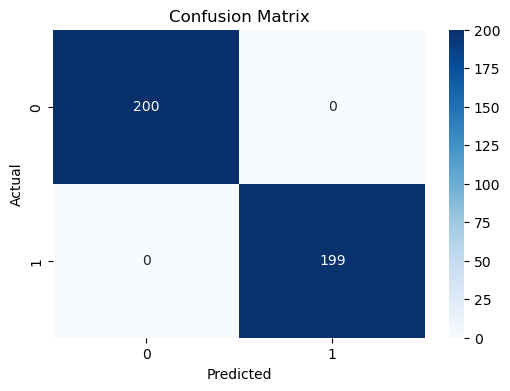

In [59]:

y_pred_g = g_model.predict(X_train)  


cm_g = confusion_matrix(y_train, y_pred_g)  

print(classification_report(y_train, y_pred_g))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_g, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        49
           1       0.91      0.80      0.85        51

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.87      0.86      0.86       100



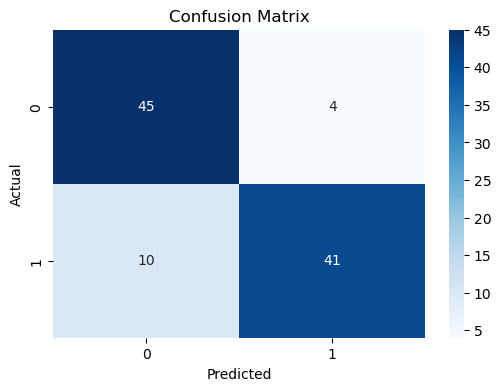

In [61]:
y_test_g = g_model.predict(X_test)  


cm_g = confusion_matrix(y_test, y_test_g)  

print(classification_report(y_test, y_test_g))
plt.figure(figsize=(6, 4))
sns.heatmap(cm_g, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()